## 모델 성능평가

#### 머신러닝 프로세스

- 데이터 가공/변환
- 모델 학습/예측
- 평가(Evaluation)

### 평가 지표

#### 분류 모델의 평가지표
: 예측 대상이 범주형 데이터인 경우
- 정확도(Accuracy)
- 재현율(Recall)
- 정밀도(Precision)
- F1 measure
- ROC curve
- AUC
    
#### 회귀 모델의 평가 지표
: 예측 대상이 수치 데이터인 경우
- MSE(Mean Square Error)
- RMSE(Root Mean Square Error)
- MAE(Mean Absolute Error)
- MAPE(Mean Absolute Percentage Error)
- $ R^2 $


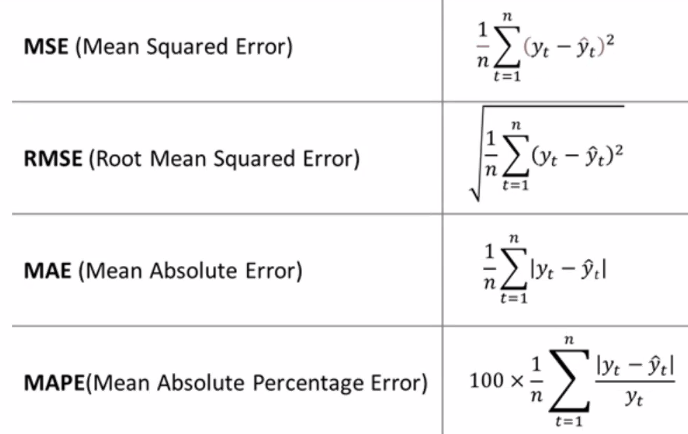

# 분류 모델의 성능 평가지표

## Accuracy(정확도)

- 실제 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표

- $ 정확도(Accuracy) =  \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수} $


- 직관적으로 모델 예측 성능을 나타내는 평가 지표
- 그러나 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 
    - 정확도 수치 하나만 가지고 성능을 평가하지는 않음


- 특히 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 지표가 아님


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
from sklearn.base import BaseEstimator # ML 모델의 프레임을 생성해주는 모듈

### 타이타닉 생존자 예측하는 더미 클래스 생성

In [3]:
# 아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는 단순한 분류기 (classifier) 생성
# BaseEstimator를 상속받아 생성

class MyDummyClassfier(BaseEstimator):
    def fit(self, X, y=None): # 아무것도 학습하지 않음
        pass
        
    def predict(self, X): # 예측은 단순히 sex feature가 1이면 0, 그렇치 않으면 1로 예측함
        pred = np.zeros((X.shape[0],1)) # 예측값을 0으로 초기화 : 2차원 형태(,1)
        
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: # 남자이면
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

**MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행**

In [4]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [5]:
# 타이타닉 생존자 예측 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df,
                                                  y_titanic_df,
                                                  test_size=0.2,
                                                  random_state=0)

In [6]:
## 위에서 생성한 dummy 클래스를 이용해서 학습/예측 평가수행
myclf = MyDummyClassfier()
myclf.fit(X_train, y_train)
mypred = myclf.predict(X_test)

print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypred)))

Dummy Classifier의 정확도는: 0.7877


### 2. MNIST 데이터 세트

* 0~9까지의 숫자 이미지의 픽셀 정보를 가지고 있고
* 이를 기반으로 숫자 Digit을 예측하는 데 사용
* 사이킷런의 load_digits() API를 통해 MNIST 데이터 세트 제공


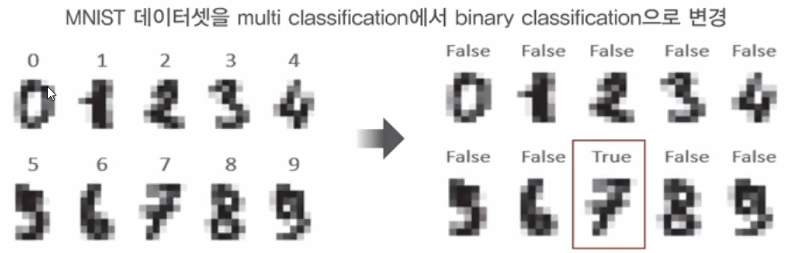

**이진 분류 문제로 변환**
* 불균형한 데이터 세트로 변형
* 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환
* True : 전체 데이터의 10%
* False : 90%
    
**입력되는 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해**
* 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타냄

### 정확도 평가 지표의 맹점
* 아무것도 하지 않고 무조건 특정한 결과로 찍어도
* 데이터가 균일하지 않은 경우 높은 수치가 나타날 수 있음

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

**digit 데이터 로드**

In [10]:
digits = load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [11]:
digits.data.shape
digits.target.shape

(1797, 64)

(1797,)

In [14]:
### label이 7인 데이터는 label 값을 1(True)로 그외 데이터는 0(False)로 변환

y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
# 학습 / 테스트 데이터 세트로 분리 (default = 0.25)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [16]:
X_train.shape

(1347, 64)

## 확인 필요

In [17]:
# 불균형한 레이블 데이터 분포도 확인. 
# # 전체 1797 중 450 : 약 25% 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64


In [19]:
# Dummy Classifier로 학습/예측/정확도 평가

fake_cl = MyFakeClassifier()
fake_cl.fit(X_train, y_train)
fakepred = fake_cl.predict(X_test)
accuracy = accuracy_score(y_test, fakepred)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy))

모든 예측을 0으로 하여도 정확도는:0.900


# Confusion Matrix (오차행렬)

오차행렬 (Confusion Matrix : 혼동행렬)
* 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
* 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표
* 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떤 유형을 가지고 맵핑되는지 나타냄
* 예측 클래스와 실제 클래스의 값 유형에 따라 TN, FP, FN, TP 형태
* TN, FP, FN, TP 값을 다양하게 결합해 분류 모델 예측 성능의 오류가 어떤 모습으로 발생하는지 알 수 있음


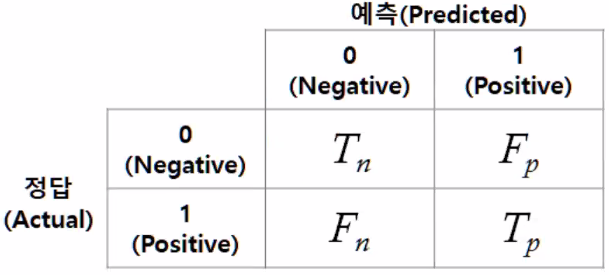

TN, FP, FN, TP는 예측 클래스와 실제 클래스의 
* Positive 결정값(1)과 Negative 결정값(0)의 결합에 따라 결정
* 앞 문자 T/F(True/False) : 예측값과 실제값이 '같은가/틀린가' 의미
* 뒤 문자 N/P(Negative/Positive) : 예측 결과 값이 부정(0)/긍정(1) 의미
* 예 : TN (True Negative) 
    - 앞 True : 예측 클래스 값과 실제 클래스 값이 같다는 의미
    - 뒤 Negative : 예측 값이 Negative 값이라는 의미


In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 위에서 사용한 데이터는 불균형한 데이터 세트
- 정확도 보다 정밀도, 재현율 평가지표가 더 선호되고 있음

### 정밀도(Predision)와 재현율(Recall)
* Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 앞의 MyFakeClassifier는 Positive로 예측한 TP값이 하나도 없기 때문에
* 정밀도와 재현율 값이 모두 0


**정밀도와 재현율 계산 공식**
* 정밀도 = TP / (FP + TP) => 예측을 1로한 결과에서 정답이 얼마나 되느냐?
* 재현율 = TP / (FN + TP) => 실제 1인 값을 얼마나 맞췄느냐(재현해 냈느냐?)

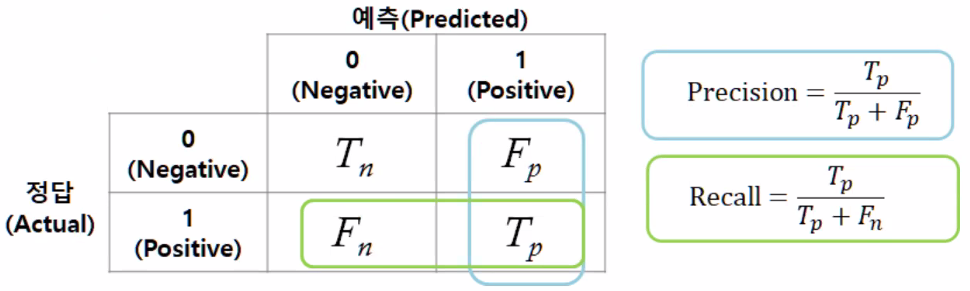

### 정밀도/재현율/오차행렬 API

- 정밀도 계산 : precision_score() 
- 재현율 계산 : recall_score()
- 오차행렬 : confusion_matrix()

In [21]:
from sklearn.metrics import accuracy_score, precision_score , recall_score


### MNIST 데이터를 인진 분류 데이터로 변환후 학습을 위해 사용한 모델 MyFakeClassifier()를 이용해 도출해낸 예측값
precision_score(y_test, fakepred)
recall_score(y_test, fakepred)

## 1이 정답인 데이터를 얼마나 많이 예측해냈는지 (TP) 중점을 두고 있는 평가지표 - 1이 정답인 데이터가 존재X 예측하지 못함

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

0.0

보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많지만,  
정밀도가 더 중요한 지표인 경우도 있음

예: 스팸메일 여부를 판단하는 모델
* 실제 Positive인 스팸메일을 Negative인 일반 메일로 분류하더라도
* 사용자가 불편함을 느끼는 정도이지만
* 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우
* 메일을 아예 받지 못하게 되어 업무에 차질이 생길 수 있음


**재현율이 상대적으로 더 중요한 지표인 경우**
* 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 
* 업무상 큰 영향이 발생하는 경우

예1: 암 판단 모델
* 실제 Positive인 암 환자를 
* Positive 양성이 아닌 Negative 음성으로 
* 잘못 판단했을 경우 오류의 대가가 생명을 앗아갈 정도로 심각
* 반면 실제 Negative인 환자를 암 환자인 Positive로 예측하더라도
* 재검사를 하는 수준의 비용만 소모

예2: 보험 사기와 같은 금융 사기 적발 모델
* 실제 금융거래 사기인 Positive 건을 Negative로 잘못 판단하게 되면
* 회사에 미치는 손해가 클 것임
* 반면에 정상 금융거래인 Negative를 금융사기인 Positive로 잘못 판단하더라도
* 재확인 절차를 가동하면 됨


* 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는데 적용
* **가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것**
* **반면에 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않음**

#### 타이타닉 예제로 오차 행렬 및 정밀도, 재현율 구해서 예측 성능 평가
- 타이타닉 데이터를 로지스틱 회귀로 분류 수행

### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 구해서 예측 성능 평가

In [22]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix


def get_clf_eval(y_test, pred):
    
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)     # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)         # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}'.format(accuracy, precision, recall))

In [23]:
# 타이타닉 데이터 세트 전처리 작업 내용 (7번에서 설정한 코드)

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [25]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11) # 학습/테스트 테이터셋 분리

In [26]:
# 로지스틱 회귀 모델을 이용해서 학습/예측/평가
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)


LogisticRegression()

오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.849, 정밀도: 0.774, 재현율: 0.787


### 평과 결과
- 재현율이 약간 높지만, 정밀도와 재현율이 전반적을 낮은 편임
- 좀더 강화할 수 있는 방법을 생각해야 함

## Precision/Recall Trade-off

- 정밀도와 재현율을 상호 보완적인 평가지표
    - 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어짐
    - 이를 정밀도/재현율 트레이트 오프라고 함
 

- 사이킷런에서는 분류 결정 임계값을 조절
    - 정밀도와 재현율 성능 수치를 상호 보와적으로 조정 가능하게 기능을 제공함
    

- 임계값
    - Positive 예측값을 결정하는 확률의 기준
    - 임계값을 낮출수록 True 값이 많아짐

사이킷런에서 개별 데이터별로 예측 확률을 구하는 메서드 
- predict_proba()
- 학습이 완료된 사이킷런 Classifer 객체에서 호출이 가능하고
- 테스트 피처 데이터 세트를 파라미터로 입력하면 
- 테스트 피처 레코드의 개별 클래스 예측 확률 반환
- predict() 메서드와 유사하지만 
- 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과


In [29]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:10]

array([[0.4623509 , 0.5376491 ],
       [0.87875882, 0.12124118],
       [0.87717457, 0.12282543],
       [0.88249485, 0.11750515],
       [0.85549349, 0.14450651],
       [0.88219266, 0.11780734],
       [0.88849369, 0.11150631],
       [0.20861311, 0.79138689],
       [0.78296824, 0.21703176],
       [0.36903656, 0.63096344]])

### 임계값 조정 : Binarizer 클래스 활용

Binarizer 클래스 이용 예측값 변환 예제
* threshold 파라미터를 특정 값으로 설정하고
* Binarizer 클래스의 fit_transform() 메서드를 이용해서
* 넘파이 ndarray 입력 값을 지정된 threshold보다 같거나 작으면 0 값으로,
* 크면 1값으로 변환해서 반환


In [83]:
from sklearn.preprocessing import Binarizer


X = [[ 0.5, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

## threshold 기준값 보다 같거나 작으면 0을 크면 1을 반환
binarizer = Binarizer(threshold=1.0) ## 임계값 1.0을 기준으로 잡아줌
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


### 분류 결정 임계값 0.5 기반에서 예측값 변환

In [30]:
from sklearn.preprocessing import Binarizer

# 임계값 0.5 설정
c_threshold = 0.5

pred_proba

array([[0.4623509 , 0.5376491 ],
       [0.87875882, 0.12124118],
       [0.87717457, 0.12282543],
       [0.88249485, 0.11750515],
       [0.85549349, 0.14450651],
       [0.88219266, 0.11780734],
       [0.88849369, 0.11150631],
       [0.20861311, 0.79138689],
       [0.78296824, 0.21703176],
       [0.36903656, 0.63096344],
       [0.89974879, 0.10025121],
       [0.8751784 , 0.1248216 ],
       [0.8771687 , 0.1228313 ],
       [0.88844864, 0.11155136],
       [0.43668535, 0.56331465],
       [0.85907507, 0.14092493],
       [0.90380733, 0.09619267],
       [0.73335293, 0.26664707],
       [0.72488607, 0.27511393],
       [0.17126645, 0.82873355],
       [0.75352578, 0.24647422],
       [0.61881459, 0.38118541],
       [0.85471749, 0.14528251],
       [0.81455452, 0.18544548],
       [0.88808487, 0.11191513],
       [0.76541366, 0.23458634],
       [0.85960089, 0.14039911],
       [0.92580564, 0.07419436],
       [0.71952603, 0.28047397],
       [0.69564674, 0.30435326],
       [0.

In [31]:
pred_proba[:,1]

array([0.5376491 , 0.12124118, 0.12282543, 0.11750515, 0.14450651,
       0.11780734, 0.11150631, 0.79138689, 0.21703176, 0.63096344,
       0.10025121, 0.1248216 , 0.1228313 , 0.11155136, 0.56331465,
       0.14092493, 0.09619267, 0.26664707, 0.27511393, 0.82873355,
       0.24647422, 0.38118541, 0.14528251, 0.18544548, 0.11191513,
       0.23458634, 0.14039911, 0.07419436, 0.28047397, 0.30435326,
       0.94719377, 0.81720055, 0.1269186 , 0.82642127, 0.39953684,
       0.23458634, 0.07235994, 0.61063907, 0.05282178, 0.10384989,
       0.35131592, 0.08340938, 0.82168638, 0.70767388, 0.63042319,
       0.63043919, 0.91887351, 0.35967849, 0.94887458, 0.11194902,
       0.59247714, 0.11155136, 0.1327038 , 0.72542418, 0.30939847,
       0.19728155, 0.22641024, 0.12282645, 0.15409903, 0.43268924,
       0.28018737, 0.10061786, 0.54535406, 0.51487382, 0.44457801,
       0.09453878, 0.66658379, 0.59390643, 0.95185167, 0.14832883,
       0.12870807, 0.16832974, 0.10385209, 0.94794721, 0.19869

In [33]:
from sklearn.preprocessing import Binarizer

#Bianarizer
# 임계값 0.5 설정
c_threshold = 0.5

# predict_proba() 반환값이 [0확률,1확률]로 반환 - positive  클래스 컬럼만 추출해서 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 2차원 데이터 (-1은 자동으로 배치)

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.849, 정밀도: 0.774, 재현율: 0.787


In [34]:
c_threshold = 0.4

# predict_proba() 반환값이 [0확률,1확률]로 반환 - positive  클래스 컬럼만 추출해서 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 2차원 데이터

bina = Binarizer(threshold=c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도: 0.832, 정밀도: 0.718, 재현율: 0.836


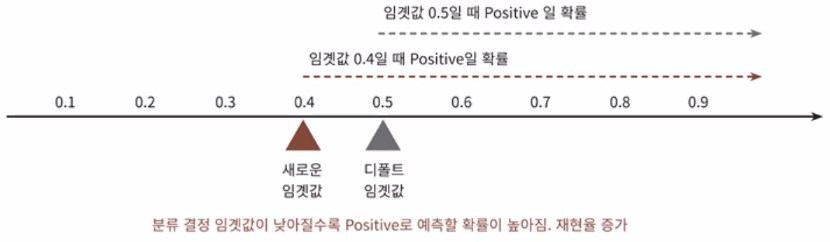
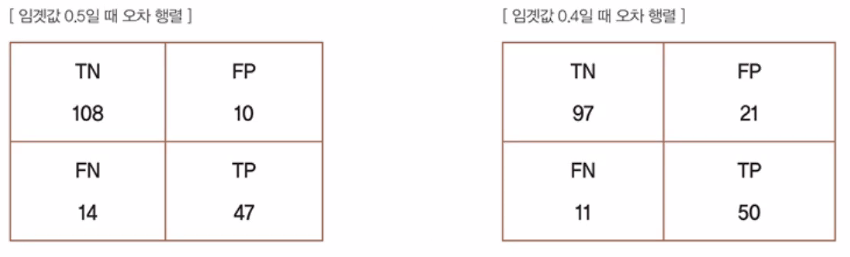

**여러개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 변환**

In [35]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

In [36]:
get_eval_by_threshold(y_test , pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도: 0.832, 정밀도: 0.718, 재현율: 0.836

임곗값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도: 0.849, 정밀도: 0.766, 재현율: 0.803

임곗값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.849, 정밀도: 0.774, 재현율: 0.787

임곗값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도: 0.866, 정밀도: 0.836, 재현율: 0.754

임곗값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도: 0.877, 정밀도: 0.882, 재현율: 0.738


### 임계값에 따른 정밀도 - 재현율 값 추출
- sklearn API
- precision_recall_curve()를 이용

**precision_recall_curve( 실제값, 레이블 값이 1일 때의 예측 확률값)**
- 정밀도, 재현율, 임계값을 ndarray로 반환
- 임계값 : 일반적으로 0.11~0.95 범위
- 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용

In [37]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

In [38]:
print('임계값 shape: ', thresholds.shape) # 0값이 제외되서 143개
print('정밀도 shape: ', precisions.shape)
print('재현율 shape: ', recalls.shape)


임계값 shape:  (143,)
정밀도 shape:  (144,)
재현율 shape:  (144,)


In [40]:
idx = np.arange(0,thresholds.shape[0], 15) # 15개씩 간격을 줘서 샘플 생성
print('sample index:', idx)
print('임계값 sample: ', np.round(thresholds[idx], 3))
print('정밀도 sample: ', np.round(precisions[idx], 3))
print('재현율 sample: ', np.round(recalls[idx], 3))
# 0.43에서 트레이트 오프가 시작되는 것을 확인 가능

sample index: [  0  15  30  45  60  75  90 105 120 135]
임계값 sample:  [0.104 0.121 0.14  0.186 0.28  0.403 0.563 0.667 0.822 0.947]
정밀도 sample:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
재현율 sample:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [41]:
col_dict={'임곗값': np.round(thresholds[idx], 2),
          '정밀도': np.round(precisions[idx], 3),
          '재현율': np.round(recalls[idx], 3)}
df = pd.DataFrame(col_dict)
df


,임곗값,정밀도,재현율
0,0.10,0.389,1.000
1,0.12,0.440,0.967
2,0.14,0.466,0.902
3,0.19,0.539,0.902
4,0.28,0.647,0.902
5,0.40,0.729,0.836
6,0.56,0.836,0.754
7,0.67,0.949,0.607
8,0.82,0.958,0.377
9,0.95,1.000,0.148


In [ ]:
### 임계값의 변경에 따른 정밀도 - 재현율

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# y_test : 실제 값  pred_proba_c1: 예측 확률 값
def precision_recall_curve_plot(y_test , pred_proba_c1): ##모델일 만들어낸 예측값 (확률)
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1) ## 각 임계값별 결과값
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # (143,)에서 143 추출
    # thresholds : 143이고, precisions과 recalls는 144개로 x, y축 값의 개수가 맞지 않으므로
    # precisions, recalls로 그래프 그리면 오류 
    # y 값을 [0:threshold_boundary] ([0:143])로 143개 출해서 x축 개수와 맞춤
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') 
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    # xlim() : X축 범위를 지정하거나 반환
    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


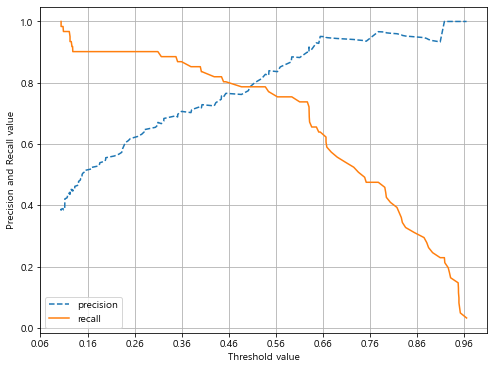

In [43]:
# y_test : 실제 값
# lr_clf.predict_proba(X_test)[:, 1] : 레이블 값이 1일때(두번째)의 예측 확률 값
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

그래프 결과
- 임계값이 낮을 수록 많은 수의 양성 예측으로 인해 
- 재현율이 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐
- 임계값을 계속 증가시킬수록 재현율 값이 낮아지고
- 정밀도 값은 높아지는 반대 양상 보임


#### 정밀도를 100%로 만드는 법
- 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측

#### 재현율을 100%로 만드는 법
- 모든 환자 1000명을 전부 Positive로 예측

### F1 Score
- 정밀도와 재현율의 조화평균(tip. 조화평균은 평균변화율등을 구할때 사용(평균속력등))
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 상대적으로 높은 값을 가짐


### 예 : 두 예측 모델 비교  
A 예측 모델
- 정밀도 : 0.9
- 재현율 : 0.1 (극단적 차이)
- F1 스코어 : 0.18

B 예측 모델
- 정밀도 : 0.5
- 재현율 : 0.5 (큰 차이 없음)
- F1 스코어 : 0.5 

B모델의 FI 스코어가 A모델에 비해 매우 우수

In [44]:
# 사이킷런의 F1  스코어 API : f1_score()
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
f1

0.7804878048780488